In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #this adjusts the config of the plots to be created

#Read the data

df = pd.read_csv('movies.csv')# Start writing code here...

In [2]:
#let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
#let's look at out data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
#let's check how much missing data we have

for col in df.columns:
    pcent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pcent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [12]:
#The % is quite low and since this is a basic analysis, let's get rid of the missing values

df = df.dropna()

In [16]:
# let's change to an INT format the columns budget and gross

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [17]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [45]:
#Great, now, since we have gross revenue, we should check what are the correlations against this column
#let's run some test with out hypotesis, let's try with the budget, but first let's order de df by gross

df = df.sort_values(by =['gross'], inplace=False, ascending=False)


In [46]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


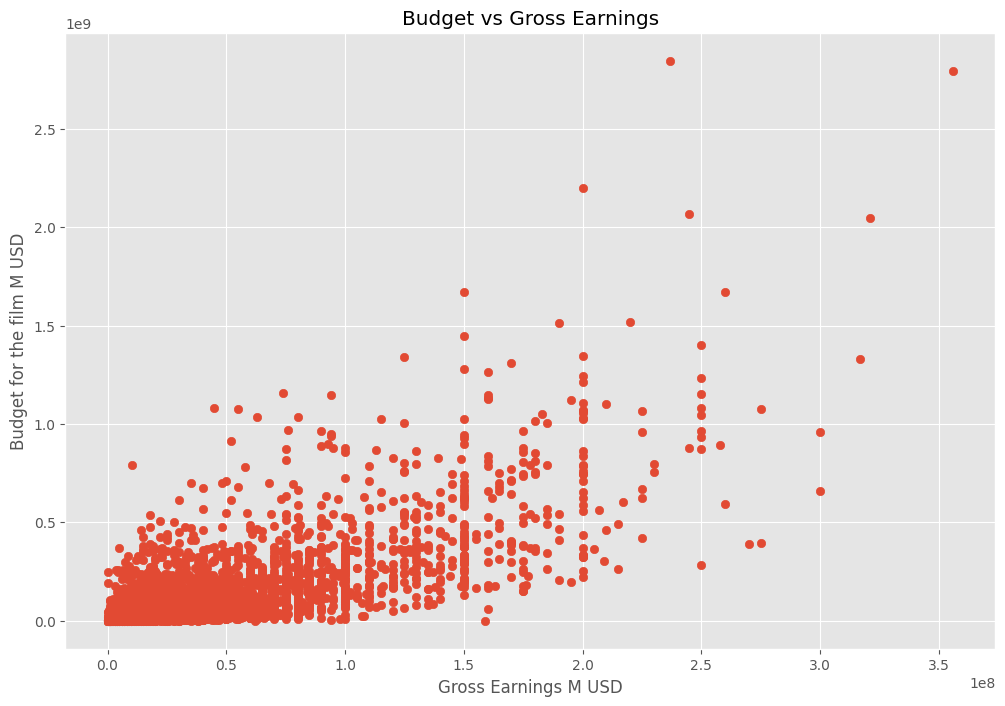

In [44]:
#scatter plot, gross vs budget

plt.scatter(x= df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings M USD')
plt.ylabel('Budget for the film M USD')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

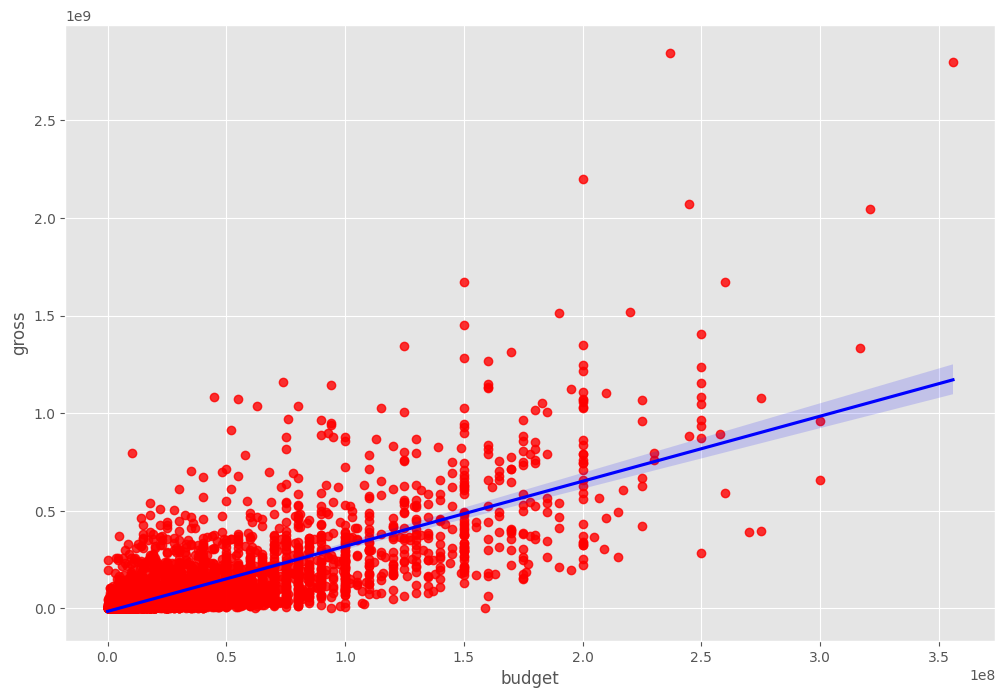

In [47]:
#scatter plot using seaborn

sns.regplot(x= 'budget', y='gross', 
            data =df, 
            scatter_kws = {'color': 'red'}, 
            line_kws = {'color': 'blue'})

In [49]:
# let's start looking at correlations

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


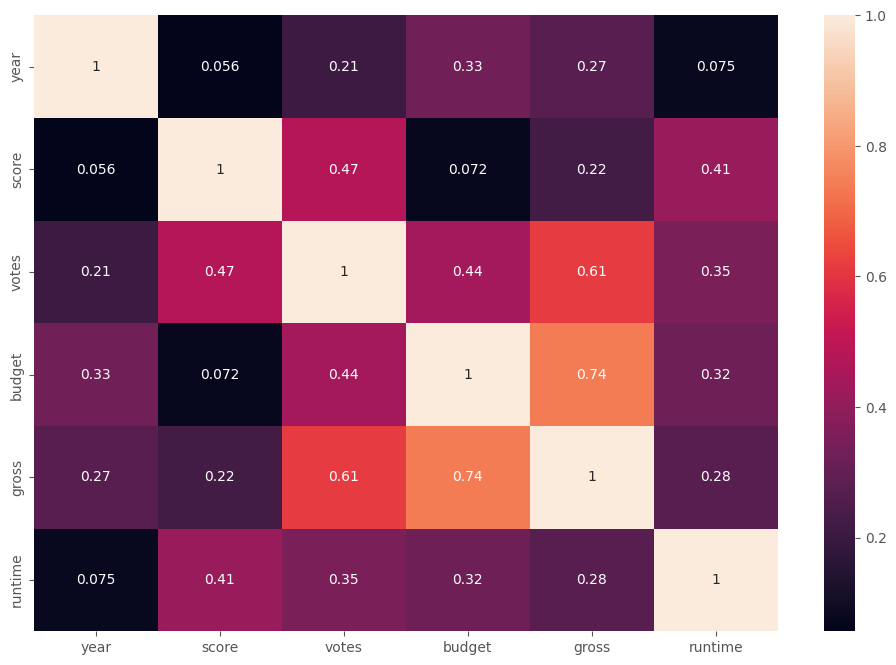

In [50]:
# let's make a quick heatmap with this

matrix = df.corr(method = 'pearson')

sns.heatmap(matrix, annot = True)

plt.show()

In [ ]:
# we can see here that we were right about the high correlation about budget and gross, 
#this does not happen with every movie tho, but in general, the more money invested, more revenue

In [51]:
#Now let's look at company correlation, but we need to make it an int value, assing an numerical ID to them
#for that we will use the cat codes and a simple conditional loop.col_name

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtypes == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes 

df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0


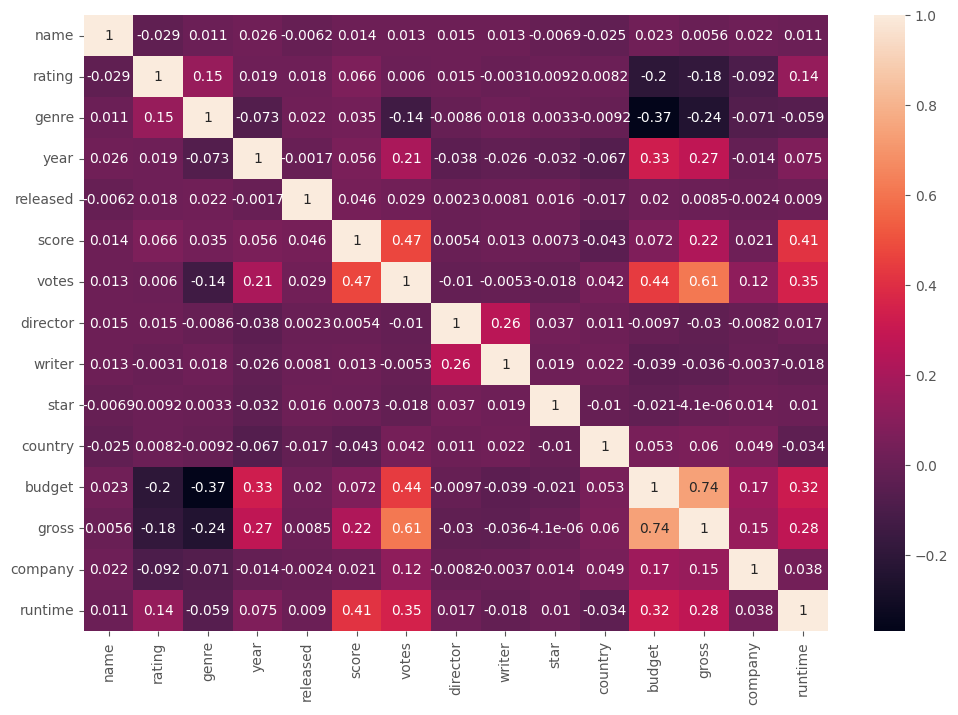

In [52]:
matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(matrix, annot = True)

plt.show()

In [54]:
#now let's order ir by correlation to make easier to see by category

matrix = df_numerized.corr()

corr_pairs = matrix.unstack()

corr_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [70]:
#now let's order them ans see the higher corelations

high_corr = corr_pairs[(corr_pairs)> 0.5]
high_corr

name      name        1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
          gross       0.614751
director  director    1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
          gross       0.740247
gross     votes       0.614751
          budget      0.740247
          gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [71]:
#So it seems like votes and buget have the highest correlation apart from the obvious 
#The company which produces the movie has no correlation to the gross revenue, this means
#that the quality market of films in a production wise is very competitive, what makes the difference
#seems to be the story and characters 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e8c617c-c369-4a2a-8106-13a35841ea2c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>